### Stereoscope annotation tutorial         

In this notebook, we present the workflow to run Stereoscope. We map the adult heart cell atlas data from [Litviňuková et al (2020)](https://www.nature.com/articles/s42003-020-01247-y).

#### * Import packages

In [1]:
import os
import sys
import scanpy as sc

sys.path.append(os.getcwd())
import stereoAlign

Global seed set to 0


#### * Loading and preprocessing dataset

In [2]:
sc_adata = sc.read_h5ad("demo_data/annotation/hca_heart_LV_stereoscope_subset_raw_ctl201217.h5ad")

In [3]:
sc.pp.filter_genes(sc_adata, min_counts=10)

non_mito_genes_list = [name for name in sc_adata.var_names if not name.startswith("MT-")]
sc_adata = sc_adata[:, non_mito_genes_list]

sc_adata.layers["counts"] = sc_adata.X.copy()

sc.pp.normalize_total(sc_adata, target_sum=1e5)
sc.pp.log1p(sc_adata)
sc_adata.raw = sc_adata

In [4]:
st_adata = sc.datasets.visium_sge(sample_id="V1_Human_Heart")
st_adata.var_names_make_unique()

st_adata.var["mt"] = st_adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(st_adata, qc_vars=["mt"], inplace=True)

sc.pp.filter_cells(st_adata, min_counts=500)
sc.pp.filter_cells(st_adata, min_genes=500)
st_adata.layers["counts"] = st_adata.X.copy()

#### * annotation by `stereoscope`

In [5]:
st_adata = stereoAlign.ann.stereoscope_annotation(single_adata=sc_adata,
                                                  spatial_adata=st_adata,
                                                  annotation="cell_states",
                                                  train_single_model=True,
                                                  train_spatial_model=True,
                                                  model_path="./stereoscope_output")

Global seed set to 0
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 100/100: 100%|██| 100/100 [06:16<00:00,  3.77s/it, loss=5.89e+05, v_num=1]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Epoch 2000/2000: 100%|█| 2000/2000 [16:15<00:00,  2.05it/s, loss=2.29e+07, v_num


#### * visualization annotation results

In [8]:
import numpy as np

In [11]:
annotation_types = sc_adata.obs["cell_states"].cat.categories.tolist()

In [29]:
random_select = list(np.asarray(annotation_types)[np.random.choice(len(annotation_types), 
                                                                   size=int(len(annotation_types)*0.3), 
                                                                   replace=False)])

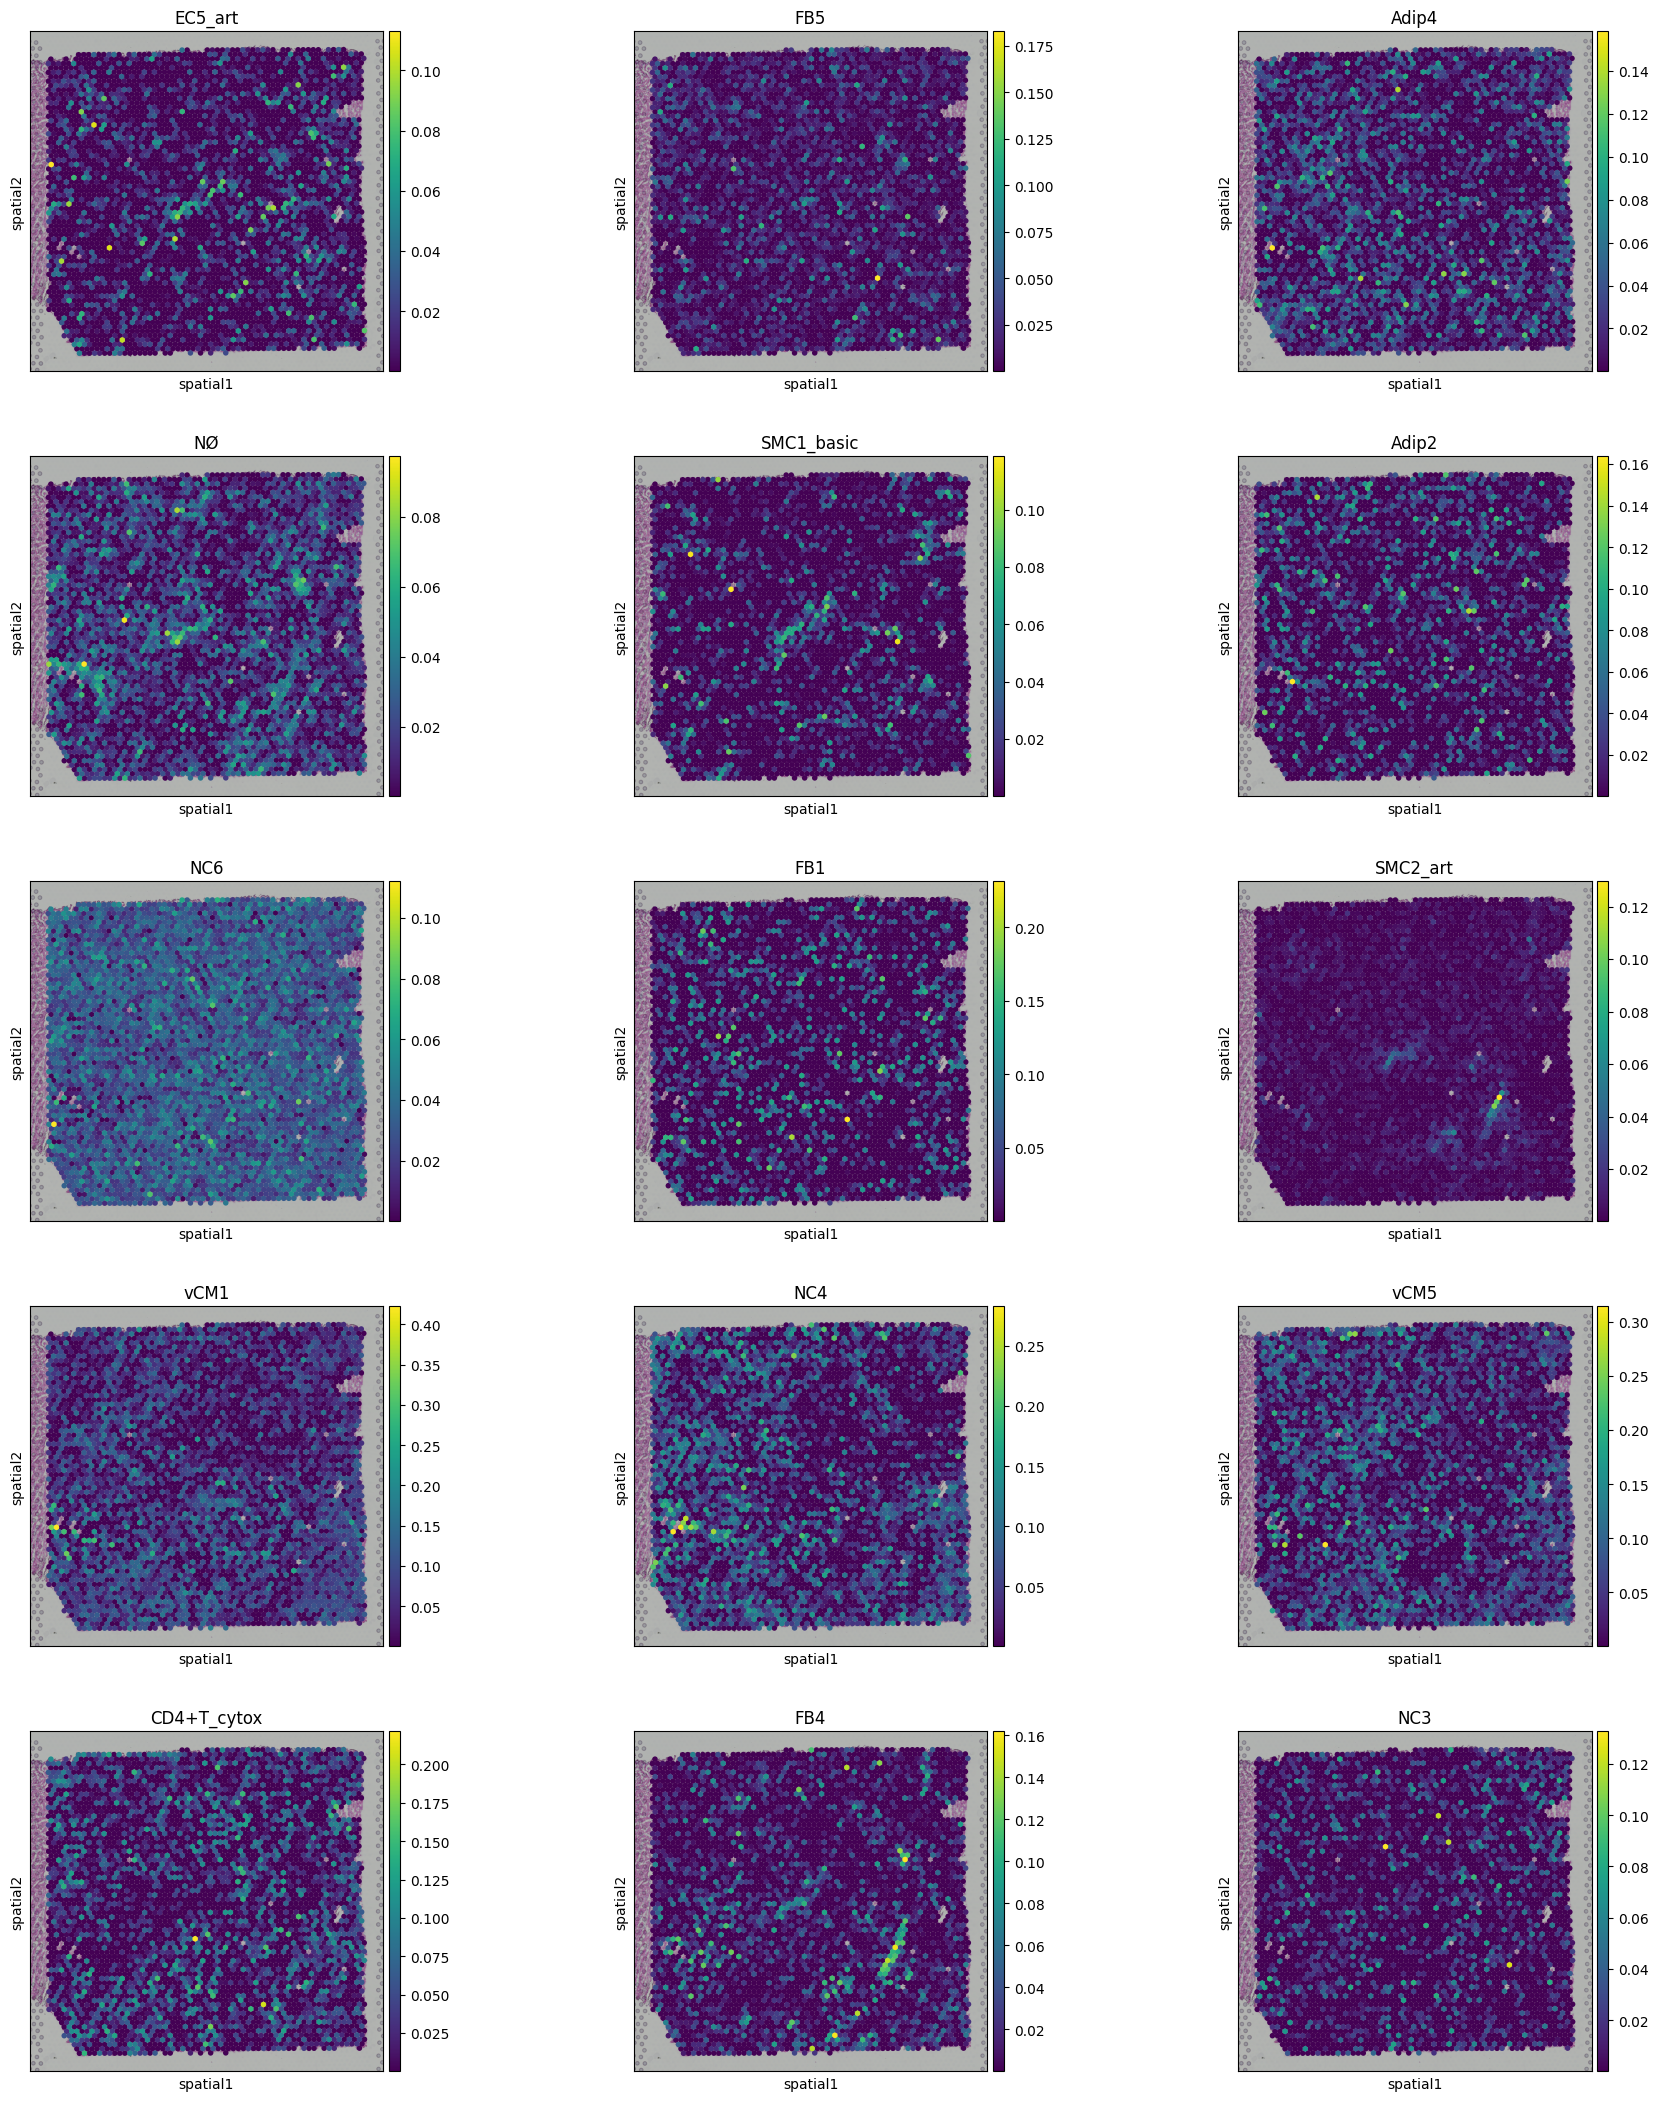

In [34]:
sc.pl.spatial(st_adata, color=random_select, spot_size=150, ncols=3)